# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Defining the problem ----

The goal of this project is to predict the salary of a new job posting by examining the dataset of job postings and by building a model to predict the salaries for the job postings in the test_salaries dataset.

The tool used id Python 3 with it libraries and packages for data manipulation, data visulisation and  developing predictive modelling algorithms.

In [1]:
#my info
__author__ = "Ahsana Ahffan"
__email__ = "ahsanahf@gmail.com"

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [3]:
#load the data into a Pandas dataframe
train_features_df=pd.read_csv("data/train_features.csv")
test_features_df=pd.read_csv("data/test_features.csv")
train_salaries_df=pd.read_csv("data/train_salaries.csv")

In [4]:
train_features_df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

In [5]:
#Preview of dataframes
train_features_df.head(7)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24


In [6]:
test_features_df.head(7)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32


In [7]:
train_salaries_df.head(7)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178


In [8]:
#Use info to see length and datatypes
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [10]:
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [11]:
#Merge train features dataframe and train salaries dataframe on jobId
train_df=pd.merge(train_features_df,train_salaries_df,on='jobId')
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### ---- 3 Clean the data ----

In [13]:
#look for duplicate data
train_df.duplicated().sum()

0

In [14]:
test_features_df.duplicated().sum()

0

In [15]:
#Check for entries with salary<=0
(train_df.salary<=0).sum()

5

In [16]:
#Remove those entries with salary<=0
train_data=train_df[(train_df.salary>0)]
traindata_df=train_data.copy()
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [17]:
len(train_data)

999995

### ---- 4 Explore the data (EDA) ----

In [18]:
#Identify numerical and categorical varibales
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [19]:
test_features_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [20]:
numeric_cols=['yearsExperience','MilesFromMetropolis']
categorical_cols=['jobId','companyId','jobType','degree','major','industry']

In [21]:
#Summarize numericaland categorical variables separately
train_data.describe(include=[np.number])

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [22]:
train_data.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362685053862,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


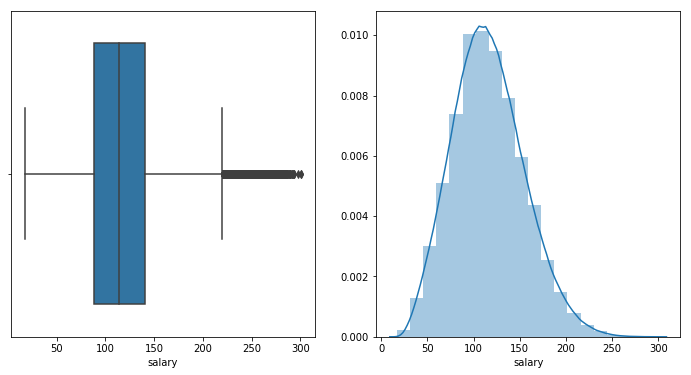

In [23]:
#Visualize target variable distribution and boxplot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(train_data.salary)
plt.subplot(1,2,2)
sns.distplot(train_data.salary,bins=20)
plt.show()

From the above visualization we can infer that although most of the data are somewhere between 75 and 150, there are some potential outliers

In [24]:
#Use 1.5 IQR rule to find outliers
stat = train_data.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5*IQR
lower = stat['25%'] - 1.5*IQR
print('The upper and lower bounds of suspected outliers are {} and {}.'.format(upper,lower))

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64
The upper and lower bounds of suspected outliers are 220.5 and 8.5.


In [25]:
#Check potential outlier below lower bound
print(train_data[train_data.salary < 8.5])

Empty DataFrame
Columns: [jobId, companyId, jobType, degree, major, industry, yearsExperience, milesFromMetropolis, salary]
Index: []


Since there is no data with salary below lower bound, we don't need to remove any entries

In [26]:
#Check number of potential outliers above upper bound for each jobtype
train_data.loc[train_data.salary>220.5,'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

There are positions with jobType 'Junior' and salary above upper bound which makes them suspicious outliers

In [27]:
#Check for suspicious potential outliers above upper bound
print(train_data[(train_data.salary > 220.5) & (train_data.jobType == 'JUNIOR')])

                   jobId companyId jobType     degree        major industry  \
1222    JOB1362684408909    COMP40  JUNIOR    MASTERS      COMPSCI      OIL   
27710   JOB1362684435397    COMP21  JUNIOR   DOCTORAL  ENGINEERING      OIL   
31355   JOB1362684439042    COMP45  JUNIOR   DOCTORAL      COMPSCI  FINANCE   
100042  JOB1362684507729    COMP17  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
160333  JOB1362684568020    COMP18  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
189582  JOB1362684597269    COMP32  JUNIOR   DOCTORAL     BUSINESS      OIL   
214606  JOB1362684622293    COMP47  JUNIOR    MASTERS     BUSINESS  FINANCE   
303778  JOB1362684711465    COMP51  JUNIOR    MASTERS  ENGINEERING      WEB   
348354  JOB1362684756041    COMP56  JUNIOR   DOCTORAL  ENGINEERING      OIL   
427593  JOB1362684835280    COMP54  JUNIOR   DOCTORAL  ENGINEERING  FINANCE   
500739  JOB1362684908426    COMP40  JUNIOR   DOCTORAL  ENGINEERING      OIL   
627534  JOB1362685035221     COMP5  JUNIOR   DOCTORA

By examining the above data it is clear that eventhough the jobType is JUNIOR, all these employees has atleast 18 years of experience and majority of them has masters and doctoral degree. So the data should be good and no need to remove any entries

In [28]:
#Define a function to plot the relation between features and the target
def plot_feature(df,col):
    plt.figure(figsize=[6,14])
    plt.subplot(3,1,2)
    if df[col].dtype=='int64' or col == 'companyId':
        mean=df.groupby([col])['salary'].mean().plot()
        plt.xlabel(col)
        plt.ylabel("Mean Salary")
        plt.subplot(3,1,1)
        df[col].value_counts().sort_index().plot()
        plt.xlabel(col)
        plt.ylabel("Counts")
    else:
        mean=df.groupby(by=[col])['salary'].mean().sort_values(ascending=True).index
        sns.boxplot(x=col,y="salary",data=df,order=mean)
        plt.xticks(rotation=20)
        plt.subplot(3,1,1)
        df[col].value_counts().sort_index().plot()
        plt.xlabel(col)
        plt.ylabel("Counts")
    

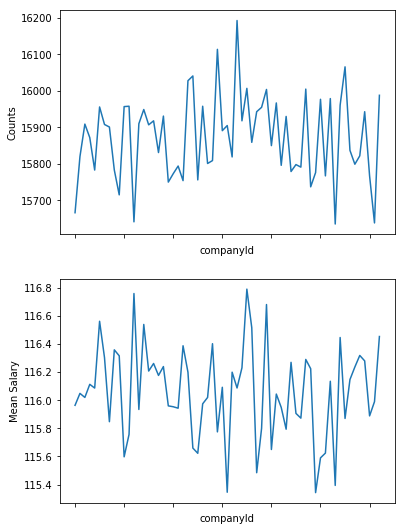

In [29]:
plot_feature(train_data,'companyId')

From the above plot of companyId against the mean salary,we can infer that salary dont have much correlation with the feature companyId

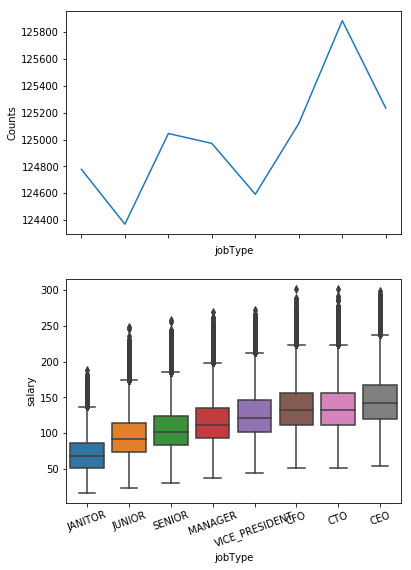

In [30]:
plot_feature(train_data,"jobType")

From the above plots we can find a positive relation between jobType and salary. Higher the job position,higher is the salary

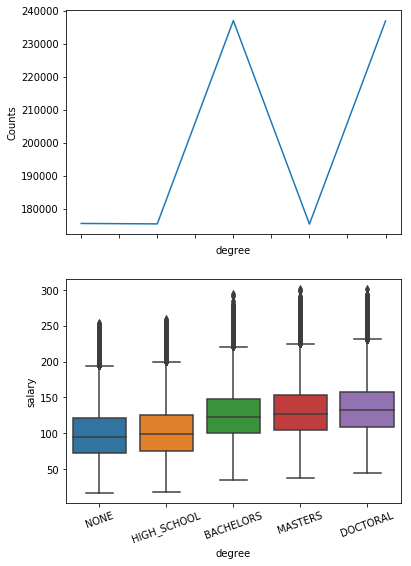

In [31]:
plot_feature(train_data,"degree")

It is clear from the plots that employee with highest degree and has the highest salary and thos with lowest degree has the lowest salary. That is salary increases with the level of education attained

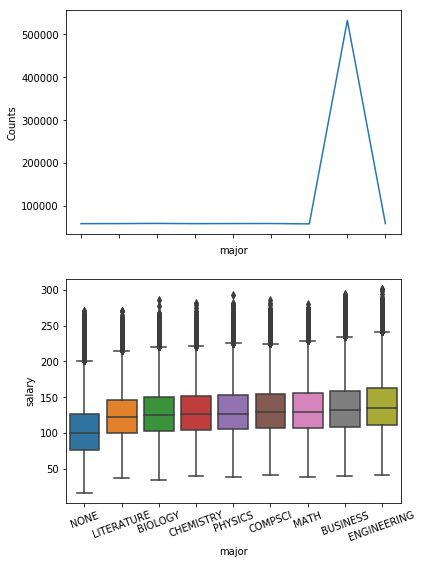

In [32]:
plot_feature(train_data,"major")

The plot shows that there is a slight difference in the salaries of employees with different major. Those with an engineering major has the highest salary and those with no major has the lowest salary 

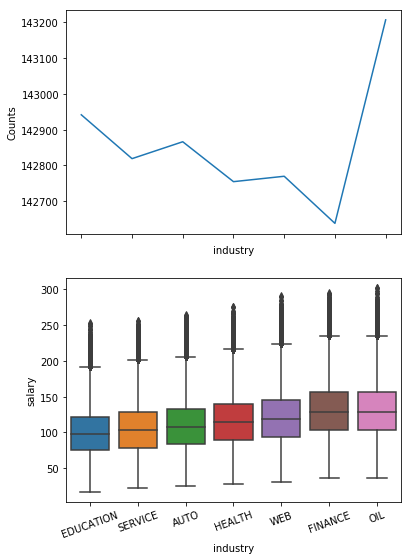

In [33]:
plot_feature(train_data,"industry")

It is clear from the above plots that different industry has different salary range for their employees. Oil industry gives the highest salary  while those works in the education sector receives the lowest salary

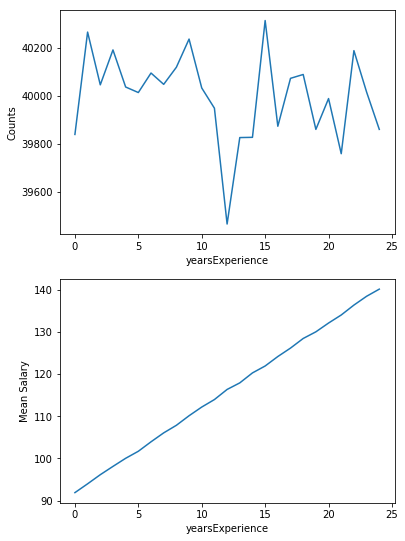

In [34]:
plot_feature(train_data,"yearsExperience")

It is very clear from the plot that years of experience has a direct positive relation between the salary

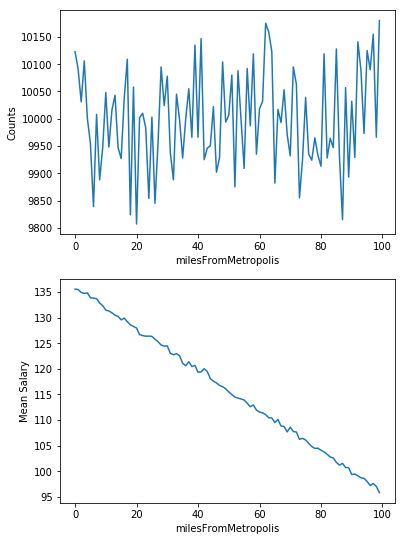

In [35]:
plot_feature(train_data,"milesFromMetropolis")

From the above plot we can infer that employees who are close to metropolis are paid higher that those who are away from metropolis. That is milesFromMetropolis feature is inversly related to the target,salary

In [36]:
#Explore correlation between features
def encode_label(df,col):
    cat_dict={}
    cats=df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat]=df[df[col]==cat]['salary'].mean()
    df[col]=df[col].map(cat_dict)


In [37]:
for col in train_data.columns:
    if (train_data[col].dtype.name == "object") & (col != "jobId"):
        train_data[col] = train_data[col].astype("category")     

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
train_data.dtypes

jobId                    object
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

In [39]:
for col in train_data.columns:
    if train_data[col].dtype.name == "category":
        encode_label(train_data,col)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [40]:
print(train_data.dtypes)

jobId                   object
companyId              float64
jobType                float64
degree                 float64
major                  float64
industry               float64
yearsExperience          int64
milesFromMetropolis      int64
salary                   int64
dtype: object


In [41]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130
1,JOB1362684407688,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101
2,JOB1362684407689,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137
3,JOB1362684407690,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142
4,JOB1362684407691,115.888501,125.368630,125.454663,130.372436,130.747659,8,16,163


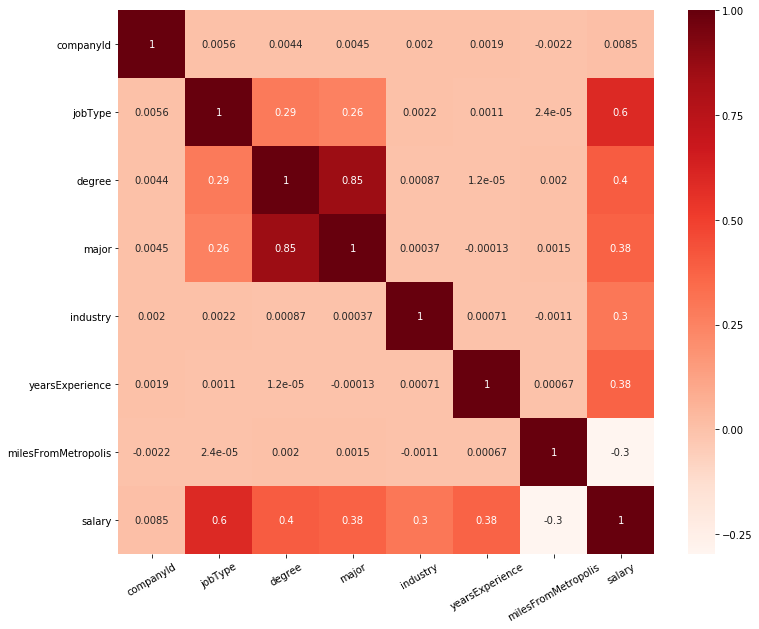

In [42]:
#Explore correlation between features
fig=plt.figure(figsize=[12,10])
features=['companyId','jobType','degree','major','industry','yearsExperience','milesFromMetropolis']
sns.heatmap(train_data[features+['salary']].corr(),cmap='Reds',annot=True)
plt.xticks(rotation=30)
plt.show()

### ---- 5 Establish a baseline ----

In [43]:
#import libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [44]:
#Define a function to perform one-hot encoding on all categorical variables and combine them with contionuos variables
def one_hot_encode_feature_df(df,cat_vars=None, num_vars=None):
    cat_df=pd.get_dummies(df[cat_vars])
    num_df=df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df,num_df],axis=1)

#Define a function to return target dataframe
def get_target_df(df,target):
    return df[target]

#Define a function to train each model
def train_model(model,train_features_df,target_features_df,num_pocs,mean_mse,cv_std):
    neg_mse=cross_val_score(model,train_features_df,target_features_df,cv=2,n_jobs=num_procs,scoring="neg_mean_squared_error")
    mean_mse[model]= -1.0*np.mean(neg_mse)
    cv_std[model]=np.std(neg_mse)
    
def print_summary(model,mean_mse,cv_std):
    print('\nModel:\n',model)
    print('\nAverage MSE:\n',mean_mse[model])
    print('\nStandard Deviation during CV:\n',cv_std[model])
    

#Define a function to save model,model summary feature importances and predictions
def save_results(model,mean_mse,predictions,feature_importances):
    with open('model.text','w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv')
    np.savetxt('predictions.csv',predictions,delimiter=',')
    
test_df=pd.read_csv("data/test_features.csv")   

## Part 3 - DEVELOP

### ---- 6 Engineer features  ----

In [45]:
#Define variables
categorical_vars=['companyId','jobType','degree','major','industry']
numeric_vars=['yearsExperience','milesFromMetropolis']
target_var='salary'

#clean,shuffle and reindex training data
clean_train_df=shuffle(traindata_df).reset_index()

#encode categorical data and get final feature dfs
print("Encoding data")
train_features_df=one_hot_encode_feature_df(clean_train_df,cat_vars=categorical_vars,num_vars=numeric_vars)
test_features_df=one_hot_encode_feature_df(test_df,cat_vars=categorical_vars,num_vars=numeric_vars)

#Get target dataframe
target_df=get_target_df(clean_train_df,target_var)



Encoding data


In [46]:
#Initialize model lists and dicts
models=[]
mean_mse={}
cv_std={}
res={}

#Define number of processes to run in parallel
num_procs=2

#Shared model parameters
verbose_level=5

### ---- 7 Create models ----

In [47]:
#Create models
lr=LinearRegression()
lr_std_pca=make_pipeline(StandardScaler(),PCA(),LinearRegression())
rf=RandomForestRegressor(n_estimators=60,n_jobs=num_procs,max_depth=25,min_samples_split=60,max_features=30, \
                         verbose=verbose_level)
gbm=GradientBoostingRegressor(n_estimators=200,max_depth=5,loss='ls',verbose=verbose_level)
models.extend([lr,lr_std_pca,rf,gbm])

### ---- 9 Test models ----

In [48]:
#do 5-fold cross validation on models and measure MSE
#Cross validate models using MSE as evaluation metrics and print summaries
print("Beginning cross validation")
for model in models:
    train_model(model,train_features_df,target_df,num_procs,mean_mse,cv_std)
    print_summary(model,mean_mse,cv_std)
    

Beginning cross validation

Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Average MSE:
 384.46814580352583

Standard Deviation during CV:
 0.03704140782338072

Model:
 Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

Average MSE:
 384.4675895960695

Standard Deviation during CV:
 0.029781560105021754

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=30, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=60, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=2, oob_score=False, random_state=None,
           verbo

### ---- 9 Select best model  ----

In [49]:
#Choose model with lowest MSE 
model=min(mean_mse,key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print(model)


Predictions calculated using model with lowest MSE:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=5, warm_start=False)


## Part 4 - DEPLOY

### ---- 10 Automate pipeline ----

In [50]:
#Train model on entire data set
model.fit(train_features_df,target_df)

#Create predictions based on test data
predictions=model.predict(test_features_df)

      Iter       Train Loss   Remaining Time 
         1        1351.2830           39.75m
         2        1229.8976           39.40m
         3        1129.7084           38.93m
         4        1045.3752           38.53m
         5         974.4283           38.23m
         6         914.9446           37.99m
         7         862.6779           37.75m
         8         814.8460           37.94m
         9         772.9795           38.00m
        10         737.2014           38.02m
        11         703.2007           37.90m
        12         674.8285           37.76m
        13         646.7975           37.36m
        14         622.7268           37.35m
        15         600.2103           36.95m
        16         580.4148           36.71m
        17         562.4582           36.53m
        18         546.1933           36.37m
        19         532.1733           36.15m
        20         519.7989           35.96m
        21         507.6813           35.81m
        2

       183         354.1336            3.53m
       184         354.1195            3.32m
       185         354.1117            3.10m
       186         354.0887            2.89m
       187         354.0795            2.68m
       188         354.0583            2.47m
       189         354.0385            2.27m
       190         354.0247            2.06m
       191         354.0139            1.85m
       192         353.9937            1.64m
       193         353.9833            1.43m
       194         353.9614            1.23m
       195         353.9465            1.02m
       196         353.9347           49.10s
       197         353.9223           36.77s
       198         353.9085           24.49s
       199         353.8954           12.24s
       200         353.8863            0.00s


### ---- 12 Deploy solution ----

In [51]:
#Store feature Importances
if hasattr(model,'feature_importances_'):
    importances=model.feature_importances_
else:
    importances=[0]*len(train_features_df.columns)
    
feature_importances=pd.DataFrame({'feature':train_features_df.columns,'importance':importances})
feature_importances.head()
feature_importances.sort_values(by='importance',ascending=False,inplace=True)

#Set index to feature
feature_importances.set_index('feature',inplace=True,drop=True)

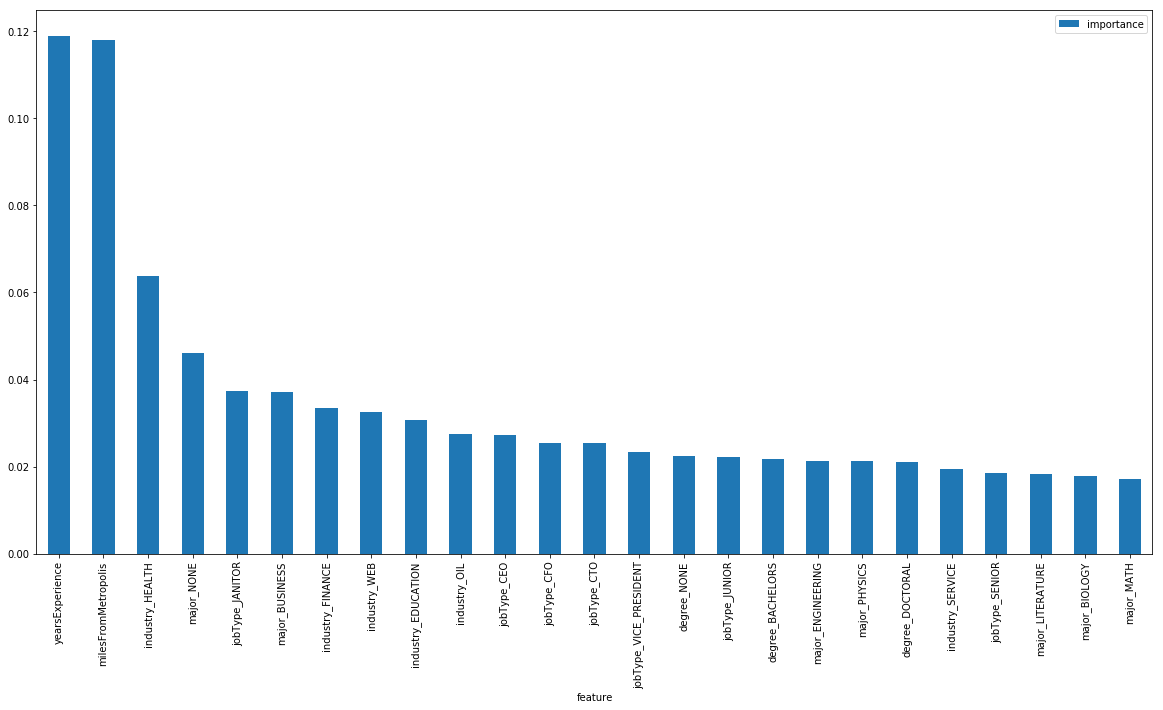

In [52]:
#Create a plot
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.show()

From the above plot we can infer that the feature yearsExperince is the most important feature in deciding the salary of a new employee followed by milesFromMetropolis

In [1166]:
#Save results
save_results(model,mean_mse[model],predictions,feature_importances)